<a href="https://colab.research.google.com/github/sudiptob2/AgRGB-Training/blob/master/MungbeanClassification_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1Nf5wwVktF_v4z7pBfgsBMJnZBfMYTtbl'})

In [ ]:
download.GetContentFile('MungbeanDataset.zip')
!unzip MungbeanDataset.zip

Archive:  MungbeanDataset.zip
   creating: MungbeanDataset/
   creating: MungbeanDataset/test/
   creating: MungbeanDataset/test/1/
  inflating: MungbeanDataset/test/1/1101.jpg  
  inflating: MungbeanDataset/test/1/1102.jpg  
  inflating: MungbeanDataset/test/1/1103.jpg  
  inflating: MungbeanDataset/test/1/1104.jpg  
  inflating: MungbeanDataset/test/1/1105.jpg  
  inflating: MungbeanDataset/test/1/1106.jpg  
  inflating: MungbeanDataset/test/1/1107.jpg  
  inflating: MungbeanDataset/test/1/1108.jpg  
  inflating: MungbeanDataset/test/1/1109.jpg  
  inflating: MungbeanDataset/test/1/1110.jpg  
  inflating: MungbeanDataset/test/1/1111.jpg  
  inflating: MungbeanDataset/test/1/1112.jpg  
  inflating: MungbeanDataset/test/1/1113.jpg  
   creating: MungbeanDataset/test/2/
  inflating: MungbeanDataset/test/2/2101.jpg  
  inflating: MungbeanDataset/test/2/2102.jpg  
  inflating: MungbeanDataset/test/2/2103.jpg  
  inflating: MungbeanDataset/test/2/2104.jpg  
  inflating: MungbeanDataset/tes

In [ ]:
from PIL import Image
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [ ]:
train_path = 'MungbeanDataset/train'
valid_path = 'MungbeanDataset/validation'
test_path = 'MungbeanDataset/test'

In [ ]:
#Take name of the classes in an array name class
classes = ["1","2"]
print(classes)

['1', '2']


In [ ]:
image_size = 150
datagen = ImageDataGenerator( 
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip = True
)

train_batches = datagen.flow_from_directory(train_path, 
                                                         target_size=(image_size,image_size), 
                                                         classes=classes,
                                                         batch_size=10)

valid_batches = datagen.flow_from_directory(valid_path,
                                                         target_size=(image_size,image_size), 
                                                         classes=classes, 
                                                         batch_size=5)

test_batches = datagen.flow_from_directory(test_path,
                                                        target_size=(image_size,image_size), 
                                                        classes=classes,
                                                        batch_size=4)

Found 138 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

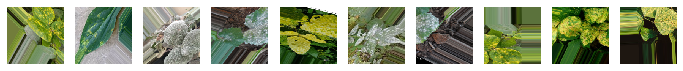

In [ ]:
imgs, labels = next(train_batches)
plots(imgs)

In [ ]:
num_classes = 2

model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'Same',activation ='relu', input_shape = (image_size,image_size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(.5))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 37, 64)        25

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=400, 
                    validation_data=valid_batches, validation_steps=50, epochs=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
400/400 [==============================] - 385s 963ms/step - loss: 0.3166 - acc: 0.8948 - val_loss: 0.1745 - val_acc: 0.9461
Epoch 2/10
400/400 [==============================] - 385s 962ms/step - loss: 0.1592 - acc: 0.9473 - val_loss: 0.0934 - val_acc: 0.9748
Epoch 3/10
400/400 [==============================] - 383s 958ms/step - loss: 0.0883 - acc: 0.9744 - val_loss: 0.1031 - val_acc: 0.9664
Epoch 4/10
400/400 [==============================] - 382s 954ms/step - loss: 0.0846 - acc: 0.9732 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 5/10
400/400 [==============================] - 379s 947ms/step - loss: 0.0685 - acc: 0.9780 - val_loss: 0.0696 - val_acc: 0.9748
Epoch 6/10
400/400 [==============================] - 384s 960ms/step - loss: 0.0597 - acc: 0.9807 - val_loss: 0.0359 - val_acc: 0.9874
Epoch 7/10
400/400 [==============================] - 384s 959ms/step - loss: 0.0404 - a

In [ ]:
model.save('mungbean_model_1_99.h5')

In [ ]:
from keras.models import load_model
model_file = drive.CreateFile({'title' : 'mungbean_model_1_99.h5'})

model_file.SetContentFile('mungbean_model_1_99.h5')
model_file.Upload()